遗传算法


In [ ]:
import random

# 定义个体类，代表种群中的一个个体
class Individual:
    def __init__(self, genes):
        self.genes = genes  # 个体的基因序列
        self.fitness = self.calculate_fitness()  # 个体的适应度

    def calculate_fitness(self):
        # 计算适应度函数，这里以基因的平方和为例
        # 适应度函数应根据具体问题进行定义
        return sum(x ** 2 for x in self.genes)

# 初始化种群
def initialize_population(size, gene_length):
    # size: 种群的大小
    # gene_length: 个体基因序列的长度
    # 生成初始种群，每个个体由随机生成的基因序列组成
    return [Individual([random.randint(-10, 10) for _ in range(gene_length)]) for _ in range(size)]

# 选择过程
def selection(population, num_parents):
    # 根据适应度排序，选择适应度最高的个体作为父母
    # population: 当前种群
    # num_parents: 选择的父母数量
    sorted_population = sorted(population, key=lambda x: x.fitness, reverse=True)
    return sorted_population[:num_parents]

# 交叉过程
def crossover(parent1, parent2):
    # 单点交叉
    # parent1, parent2: 选择的两个父本个体
    # 随机选择交叉点，交换父本基因，生成两个子代
    point = random.randint(1, len(parent1.genes) - 1)
    child1_genes = parent1.genes[:point] + parent2.genes[point:]
    child2_genes = parent2.genes[:point] + parent1.genes[point:]
    return Individual(child1_genes), Individual(child2_genes)

# 变异过程
def mutation(individual, mutation_rate=0.01):
    # 对个体的基因序列进行随机变异
    # individual: 要变异的个体
    # mutation_rate: 变异概率
    for i in range(len(individual.genes)):
        if random.random() < mutation_rate:
            # 对每个基因位以一定的概率进行增减操作
            individual.genes[i] += random.randint(-1, 1)
    # 更新个体的适应度
    individual.fitness = individual.calculate_fitness()

# 遗传算法主函数
def genetic_algorithm(population_size, gene_length, num_generations):
    # population_size: 种群大小
    # gene_length: 基因长度
    # num_generations: 进化代数
    # 初始化种群
    population = initialize_population(population_size, gene_length)
    for _ in range(num_generations):
        # 选择
        parents = selection(population, population_size // 2)
        next_generation = []
        # 生成新一代
        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(parents, 2)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            next_generation.extend([child1, child2])
        population = next_generation
        # 每一代选出适应度最高的个体
        best_individual = max(population, key=lambda x: x.fitness)
        print(f"最优适应度: {best_individual.fitness}")
    return best_individual

# 运行算法
best = genetic_algorithm(100, 5, 50)
print(f"最优个体基因: {best.genes}")



基于遗传算法交叉算子的混合型粒子群算法

In [4]:
dis_net = [[0, 0.7, 1.4, 1.9, 3.0, 3.5, 0.6, 1.2, 1.8, 2.5, 3.1, 3.9, 0.9, 2.4, 2.9, 2.9, 3.2, 4.0, 2.0, 3.7, 4.4, 4.8, 5.3, 5.4, 2.5, 4.5, 5.1, 5.3, 5.9, 6.0, 3.3, 4.0, 4.6, 5.2, 5.6, 5.9],
[0.7, 0, 0.7, 1.2, 2.3, 2.8, 1.1, 0.5, 1.1, 1.8, 2.4, 3.2, 1.6, 1.7, 2.2, 2.2, 2.5, 3.3, 2.7, 3.5, 4.2, 4.6, 4.6, 4.7, 3.2, 4.3, 4.9, 5.1, 5.4, 5.3, 4.0, 4.7, 5.3, 5.7, 6.1, 5.8],
[1.4, 0.7, 0, 0.5, 1.6, 2.1, 1.8, 1.2, 0.4, 1.1, 1.7, 2.5, 2.1, 2.4, 1.5, 1.5, 1.8, 2.6, 3.2, 4.2, 3.7, 4.1, 3.9, 4.0, 3.7, 5.0, 4.4, 4.6, 4.7, 4.6, 4.5, 5.2, 5.4, 5.2, 5.4, 5.1],
[1.9, 1.2, 0.5, 0, 1.1, 1.6, 2.3, 1.7, 0.9, 0.9, 1.4, 2.0, 2.6, 2.9, 2.0, 1.3, 1.6, 2.4, 3.7, 4.7, 4.2, 4.5, 3.7, 3.8, 4.2, 5.5, 4.9, 5.1, 4.5, 4.4, 5.0, 5.7, 5.9, 5.7, 5.2, 4.9],
[3.0, 2.3, 1.6, 1.1, 0, 0.5, 3.4, 2.8, 2.0, 0.9, 0.3, 0.9, 3.7, 4.0, 3.1, 1.7, 1.4, 1.8, 4.8, 5.8, 5.3, 4.3, 3.5, 3.2, 5.3, 6.6, 6.0, 4.9, 4.3, 3.8, 6.1, 6.8, 7.0, 5.8, 4.6, 4.3],
[3.5, 2.8, 2.1, 1.6, 0.5, 0, 3.9, 3.3, 2.1, 1.4, 0.8, 0.4, 4.2, 4.5, 2.8, 1.8, 1.9, 1.3, 5.3, 6.3, 5.2, 4.8, 3.4, 2.7, 5.8, 7.1, 5.8, 5.3, 3.8, 3.3, 6.6, 7.3, 6.5, 5.5, 4.1, 3.8],
[0.6, 1.1, 2.0, 2.5, 3.3, 4.1, 0, 0.6, 1.7, 2.4, 3.0, 3.9, 0.3, 1.8, 2.8, 2.8, 3.1, 3.9, 1.4, 3.1, 3.8, 4.2, 5.0, 5.3, 1.9, 3.9, 4.5, 4.7, 5.3, 5.8, 2.7, 3.4, 4.0, 4.6, 5.0, 5.3],
[1.2, 0.5, 1.2, 1.7, 2.7, 3.3, 0.6, 0, 1.1, 1.8, 2.4, 3.3, 0.9, 1.2, 2.2, 2.2, 2.5, 3.3, 2.0, 3.0, 3.7, 4.1, 4.6, 4.7, 2.5, 3.8, 4.4, 4.6, 5.2, 5.3, 3.3, 4.0, 4.6, 5.2, 5.6, 5.8],
[1.8, 1.1, 0.4, 0.9, 1.6, 2.5, 1.7, 1.1, 0, 0.7, 1.3, 2.2, 2.0, 2.3, 1.1, 1.1, 1.4, 2.2, 3.1, 4.0, 3.3, 3.7, 3.5, 3.6, 3.6, 4.9, 4.0, 4.2, 4.3, 4.2, 4.4, 5.1, 5.0, 4.8, 5.0, 4.7],
[2.5, 1.8, 1.1, 0.9, 0.9, 1.9, 2.4, 1.8, 0.7, 0, 0.6, 1.5, 2.7, 3.0, 1.4, 0.4, 0.7, 1.5, 3.8, 4.7, 4.0, 3.6, 2.8, 2.9, 4.3, 5.5, 4.7, 4.2, 3.6, 3.5, 5.1, 5.8, 5.7, 5.1, 4.3, 4.0],
[3.1, 2.4, 1.7, 1.4, 0.3, 0.8, 3.0, 2.4, 1.3, 0.6, 0, 0.9, 3.3, 3.3, 2.0, 1.0, 1.1, 1.8, 4.4, 4.9, 4.2, 4.0, 3.2, 3.2, 4.9, 5.9, 4.9, 4.6, 4.0, 3.8, 5.7, 6.4, 5.9, 5.3, 4.6, 4.3],
[3.9, 3.2, 2.5, 2.0, 0.9, 0.4, 3.9, 3.3, 2.2, 1.5, 0.9, 0, 4.2, 4.2, 2.9, 1.9, 1.7, 0.9, 5.3, 5.8, 5.1, 4.6, 3.0, 2.3, 5.8, 6.6, 5.8, 4.8, 3.4, 2.9, 6.6, 7.3, 6.5, 4.9, 3.7, 3.4],
[0.9, 1.4, 2.1, 2.6, 3.6, 4.1, 0.3, 0.9, 2.0, 2.7, 3.3, 4.2, 0, 1.5, 2.8, 3.1, 3.4, 4.2, 1.1, 2.8, 3.5, 3.9, 4.7, 5.4, 1.6, 3.6, 4.2, 4.4, 5.0, 5.5, 2.4, 3.1, 3.7, 4.3, 4.7, 5.0],
[2.4, 1.7, 2.4, 2.9, 3.9, 4.4, 1.8, 1.2, 2.3, 2.7, 3.6, 4.3, 1.5, 0, 1.3, 2.3, 2.6, 3.4, 2.6, 1.8, 2.5, 2.9, 3.7, 4.4, 3.1, 2.6, 3.2, 3.4, 4.0, 4.5, 3.9, 3.6, 4.2, 4.0, 4.4, 4.7],
[2.9, 2.2, 1.5, 2.0, 2.7, 3.2, 2.8, 2.2, 1.1, 1.4, 2.4, 3.0, 2.8, 1.3, 0, 1.0, 1.3, 2.1, 3.9, 2.9, 2.2, 2.6, 3.4, 3.5, 4.4, 3.9, 2.9, 3.1, 3.7, 4.1, 5.2, 4.5, 3.9, 3.7, 4.1, 4.4],
[2.9, 2.2, 1.5, 1.3, 1.3, 1.8, 2.8, 2.2, 1.1, 0.4, 1.0, 1.9, 3.1, 2.3, 1.0, 0, 0.3, 1.1, 4.2, 3.9, 3.2, 3.2, 2.4, 2.5, 4.7, 4.7, 3.9, 3.8, 3.2, 3.1, 5.5, 5.5, 4.9, 4.7, 3.9, 3.6],
[3.2, 2.5, 1.8, 1.6, 1.4, 1.9, 3.1, 2.5, 1.4, 0.7, 1.1, 1.7, 3.4, 2.6, 1.3, 0.3, 0, 0.8, 4.5, 4.2, 3.5, 2.9, 2.1, 2.2, 5.0, 5.0, 4.2, 3.5, 2.9, 2.8, 5.8, 5.8, 5.2, 4.4, 3.6, 3.3],
[4.0, 3.3, 2.6, 2.4, 1.8, 1.3, 3.9, 3.3, 2.2, 1.5, 1.8, 0.9, 4.2, 3.4, 2.1, 1.1, 0.8, 0, 5.3, 5.0, 4.1, 3.7, 2.1, 1.4, 5.8, 5.8, 4.7, 4.2, 2.5, 2.0, 6.6, 6.6, 5.4, 4.8, 2.8, 2.5],
[2.0, 2.5, 3.2, 3.7, 4.7, 5.2, 1.4, 2.0, 3.1, 3.8, 4.4, 5.3, 1.1, 2.6, 3.9, 4.2, 4.5, 5.3, 0, 1.7, 2.4, 2.8, 3.6, 4.3, 0.5, 2.5, 3.1, 3.3, 3.9, 4.4, 1.3, 2.0, 2.6, 3.2, 3.6, 3.9],
[3.7, 3.5, 4.2, 4.7, 5.4, 5.9, 3.1, 3.0, 4.1, 4.5, 5.1, 6.0, 2.8, 1.8, 2.9, 4.1, 4.0, 4.0, 1.7, 0, 0.7, 1.1, 1.9, 2.6, 2.2, 0.8, 1.4, 1.6, 2.2, 2.7, 2.5, 1.8, 2.4, 2.2, 2.6, 2.9],
[4.4, 4.2, 3.7, 4.2, 4.5, 5.0, 3.8, 3.7, 3.3, 3.6, 4.2, 5.1, 3.5, 2.5, 2.2, 3.2, 3.3, 3.3, 2.4, 0.7, 0, 0.4, 1.2, 1.9, 2.9, 1.5, 0.7, 0.9, 1.5, 2.0, 3.2, 2.3, 1.7, 1.5, 1.9, 2.2],
[4.8, 4.6, 4.1, 4.6, 4.9, 5.4, 4.2, 4.1, 3.7, 4.0, 4.6, 5.5, 3.9, 2.9, 2.6, 3.6, 2.9, 2.9, 2.8, 1.1, 0.4, 0, 0.8, 1.5, 3.3, 1.9, 1.0, 0.5, 1.1, 1.6, 3.4, 2.7, 1.7, 1.1, 1.5, 1.8],
[5.3, 4.6, 3.9, 3.7, 3.5, 4.0, 5.0, 4.6, 3.5, 2.8, 3.2, 3.8, 4.7, 3.7, 3.4, 2.4, 2.1, 2.1, 3.6, 1.9, 1.2, 0.8, 0, 0.7, 4.1, 2.7, 1.8, 1.3, 0.8, 1.3, 4.2, 3.1, 2.5, 1.9, 1.9, 1.8],
[5.4, 4.7, 4.0, 3.8, 3.2, 2.7, 5.3, 4.7, 3.6, 2.9, 3.2, 2.3, 5.4, 4.4, 3.5, 2.5, 2.2, 1.4, 4.3, 2.6, 1.9, 1.5, 0.7, 0, 4.8, 3.4, 2.5, 2.0, 1.1, 0.6, 4.5, 3.8, 3.2, 2.6, 1.4, 1.1],
[2.5, 3.0, 3.7, 4.2, 5.2, 5.7, 1.9, 2.5, 3.6, 4.3, 4.9, 5.8, 1.6, 3.1, 4.4, 4.7, 5.0, 5.8, 0.5, 2.2, 2.9, 3.3, 4.1, 4.8, 0, 2.0, 3.0, 3.3, 4.1, 3.9, 0.8, 1.5, 2.1, 2.7, 3.1, 3.4],
[4.5, 4.3, 5.0, 5.5, 6.0, 6.1, 3.9, 3.8, 4.8, 5.1, 5.7, 5.7, 3.6, 2.6, 3.7, 4.7, 4.8, 4.8, 2.5, 0.8, 1.5, 1.9, 2.7, 3.2, 2.0, 0, 1.0, 1.5, 2.1, 2.6, 1.7, 1.0, 1.6, 2.1, 2.5, 2.8],
[5.1, 4.9, 4.4, 4.9, 5.2, 5.3, 4.5, 4.4, 4.0, 4.3, 4.9, 4.9, 4.2, 3.2, 2.9, 3.9, 4.0, 4.0, 3.1, 1.4, 0.7, 1.0, 1.9, 2.2, 3.0, 1.0, 0, 0.5, 1.1, 1.6, 2.7, 1.6, 1.0, 1.1, 1.5, 1.8],
[5.3, 5.1, 4.6, 5.0, 4.8, 4.7, 4.7, 4.6, 4.2, 4.1, 4.5, 4.3, 4.4, 3.4, 3.1, 3.7, 3.4, 3.4, 3.3, 1.6, 0.9, 0.5, 1.3, 1.7, 3.5, 1.5, 0.5, 0, 0.6, 1.1, 2.8, 2.1, 1.2, 0.6, 1.0, 1.3],
[5.9, 5.4, 4.7, 4.5, 4.3, 4.2, 5.3, 5.2, 4.3, 3.6, 4.0, 3.8, 5.0, 4.0, 3.7, 3.2, 2.9, 2.9, 3.9, 2.2, 1.5, 1.1, 0.8, 1.1, 4.1, 2.1, 1.1, 0.6, 0, 0.5, 3.4, 2.4, 1.8, 1.2, 1.1, 1.0],
[6.0, 5.3, 4.6, 4.4, 3.8, 3.3, 5.8, 5.3, 4.2, 3.5, 3.8, 2.9, 5.5, 4.5, 4.1, 3.1, 2.8, 2.0, 4.4, 2.7, 2.0, 1.6, 1.3, 0.6, 4.6, 2.6, 1.6, 1.1, 0.5, 0, 3.6, 2.9, 2.3, 1.7, 0.8, 0.5],
[3.3, 3.8, 4.5, 5.0, 6.0, 6.5, 2.7, 3.3, 4.4, 5.1, 5.7, 6.6, 2.4, 3.9, 5.2, 5.5, 5.8, 6.6, 1.3, 3.0, 3.7, 4.1, 4.9, 5.3, 0.8, 1.7, 2.3, 2.5, 3.4, 3.1, 0, 0.7, 1.3, 1.9, 2.3, 2.6],
[4.0, 4.5, 5.2, 5.7, 6.7, 6.9, 3.4, 4.0, 5.1, 5.8, 6.4, 6.5, 3.1, 3.6, 4.7, 5.7, 5.8, 5.6, 2.0, 1.8, 2.5, 2.9, 3.7, 4.2, 1.5, 1.0, 1.6, 1.8, 2.7, 2.4, 0.7, 0, 0.6, 1.2, 1.6, 1.9],
[4.6, 5.1, 5.4, 5.9, 6.2, 5.9, 4.0, 4.6, 5.0, 5.3, 5.9, 5.5, 3.7, 4.2, 3.9, 4.9, 4.9, 4.6, 2.6, 2.4, 1.7, 2.0, 2.8, 3.2, 2.1, 1.6, 1.0, 1.2, 2.1, 1.8, 1.3, 0.6, 0, 0.6, 1.0, 1.3],
[5.2, 5.7, 5.2, 5.6, 5.4, 5.0, 4.6, 5.2, 4.8, 4.7, 5.1, 4.6, 4.3, 4.0, 3.7, 4.3, 4.0, 3.7, 3.2, 2.2, 1.5, 1.1, 1.9, 2.3, 2.7, 2.1, 1.1, 0.6, 1.2, 1.2, 1.9, 1.2, 0.6, 0, 0.4, 0.7],
[5.6, 6.1, 5.6, 5.6, 5.4, 4.9, 5.0, 5.6, 5.2, 4.7, 5.1, 4.5, 4.7, 4.4, 4.1, 4.3, 4.0, 3.6, 3.6, 2.6, 1.9, 1.5, 1.9, 2.2, 3.1, 2.5, 1.5, 1.0, 1.1, 0.8, 2.3, 1.6, 1.0, 0.4, 0, 0.3],
[5.9, 5.8, 5.1, 4.9, 4.3, 3.8, 5.3, 5.8, 4.7, 4.0, 4.3, 3.4, 5.0, 4.7, 4.4, 3.6, 3.3, 2.5, 3.9, 2.9, 2.2, 1.8, 1.8, 1.1, 3.4, 2.8, 1.8, 1.3, 1.0, 0.5, 2.6, 1.9, 1.3, 0.7, 0.3, 0]]

t = dis_net[0][20] / 10 + dis_net[35][20] / 8 + 40 / 10
print(t)

4.715


  5%|▌         | 15/300 [00:00<00:05, 54.53it/s]

j= 0
path: 0
index: 4
len(gene): 52
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
path: 1
index: 5
len(gene): 51
执行完index+1,index= 6
第0位置:1
第0:2
交叉完成第： 0
交叉完成
path: 1
index: 4
len(gene): 51
执行完index+1,index= 5
path: 0
index: 5
len(gene): 52
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
第2位置:1
第2:2
交叉完成第： 2
交叉完成
path: 1
index: 5
len(gene): 52
执行完index+1,index= 6
执行完index+1,index= 7
path: 0
index: 4
len(gene): 51
执行完index+1,index= 5
执行完index+1,index= 6
第4位置:2
第4:1
交叉完成第： 4
交叉完成
path: 0
index: 4
len(gene): 51
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
path: 1
index: 4
len(gene): 51
执行完index+1,index= 5
第6位置:1
第6:1
交叉完成第： 6
交叉完成
path: 0
index: 7
len(gene): 51
执行完index+1,index= 8
path: 1
index: 4
len(gene): 52
执行完index+1,index= 5
第8位置:4
第8:1
交叉完成第： 8
交叉完成
path: 1
index: 6
len(gene): 52
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
path: 1
index: 6
len(gene): 52
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,in

  7%|▋         | 21/300 [00:00<00:05, 50.37it/s]

path: 0
index: 14
len(gene): 38
执行完index+1,index= 15
path: 1
index: 25
len(gene): 37
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
第0位置:11
第0:22
交叉完成第： 0
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 27
len(gene): 38
执行完index+1,index= 28
第2位置:32
第2:24
交叉完成第： 2
交叉完成
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,ind

 11%|█         | 33/300 [00:00<00:05, 50.06it/s]

j= 27
path: 1
index: 14
len(gene): 37
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
第0位置:11
第0:0
交叉完成第： 0
交叉完成
path: 0
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完

 15%|█▌        | 45/300 [00:00<00:05, 50.55it/s]

交叉完成第： 6
交叉完成
path: 0
index: 24
len(gene): 38
执行完index+1,index= 25
path: 0
index: 24
len(gene): 38
执行完index+1,index= 25
第8位置:21
第8:21
交叉完成第： 8
交叉完成
path: 1
index: 26
len(gene): 37
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 24
len(gene): 38
执行完index+1,index= 25
第10位置:23
第10:21
交叉完成第： 10
交叉完成
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 

 19%|█▊        | 56/300 [00:01<00:05, 42.63it/s]

 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
第26位置:0
第26:0
交叉完成第： 26
交叉完成
path: 1
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
path: 1
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,ind

 22%|██▏       | 66/300 [00:01<00:05, 44.35it/s]

第10:0
交叉完成第： 10
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 24
len(gene): 38
执行完index+1,index= 25
第12位置:32
第12:21
交叉完成第： 12
交叉完成
path: 1
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
path: 1
index: 24
len(gene): 38
执行完index+1,index= 25
第14位置:0
第14:21
交叉完成第： 14
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 3
len(gene): 38
第16位置:32
第16:0
交叉完成第： 16
交叉完成
path: 0
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完inde

 26%|██▌       | 77/300 [00:01<00:04, 45.30it/s]

37.3
j= 68
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:0
第0:32
交叉完成第： 0
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path

 29%|██▉       | 87/300 [00:01<00:04, 45.45it/s]

交叉完成第： 26
交叉完成
path: 1
index: 4
len(gene): 37
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:1
第28:32
交叉完成第： 28
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第30位置:32
第30:32
交叉完成第： 30
交叉完成
35.2
j= 81
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完in

 32%|███▏      | 97/300 [00:02<00:04, 42.99it/s]

35.2
j= 92
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:32
第0:32
交叉完成第： 0
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,in

 36%|███▌      | 107/300 [00:02<00:04, 41.82it/s]

path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:32
第0:32
交叉完成第： 0
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 3
len(gene): 38
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完

 39%|███▉      | 117/300 [00:02<00:04, 43.35it/s]

交叉完成第： 8
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第10位置:32
第10:32
交叉完成第： 10
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第12位置:32
第12:32
交叉完成第： 12
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第14位置:32
第14:32
交叉完成第： 14
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第16位置:32
第16:32
交叉完成第： 16
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第18位置:32
第18:32
交叉完成第： 18
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第20位置:32
第20:32
交叉完成第： 20
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第22位置:32
第22:32
交叉完成第： 22
交叉完成
path: 1
index: 35
len(gene)

 42%|████▏     | 127/300 [00:02<00:03, 44.79it/s]

第8:32
交叉完成第： 8
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第10位置:32
第10:32
交叉完成第： 10
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第12位置:32
第12:32
交叉完成第： 12
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第14位置:32
第14:32
交叉完成第： 14
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第16位置:32
第16:32
交叉完成第： 16
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第18位置:32
第18:32
交叉完成第： 18
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第20位置:32
第20:32
交叉完成第： 20
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第22位置:32
第22:32
交叉完成第： 22
交叉完成
path: 0
index: 35
len

 46%|████▌     | 137/300 [00:03<00:04, 39.91it/s]

33.699999999999996
j= 132
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 49%|████▉     | 147/300 [00:03<00:03, 41.56it/s]

 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完ind

 52%|█████▏    | 156/300 [00:03<00:03, 38.55it/s]

path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完in

 55%|█████▍    | 164/300 [00:03<00:03, 36.15it/s]

33.699999999999996
j= 158
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 56%|█████▌    | 168/300 [00:03<00:03, 33.74it/s]

 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:0
第0:32
交叉完成第： 0
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第4位置:32
第4:32
交叉完成第： 4
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index=

 59%|█████▊    | 176/300 [00:04<00:04, 28.57it/s]

第24:32
交叉完成第： 24
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第26位置:32
第26:32
交叉完成第： 26
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:32
第28:32
交叉完成第： 28
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第30位置:32
第30:32
交叉完成第： 30
交叉完成
33.699999999999996
j= 170
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,i

 63%|██████▎   | 189/300 [00:04<00:03, 33.56it/s]

33.699999999999996
j= 179
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:0
第0:32
交叉完成第： 0
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1

 64%|██████▍   | 193/300 [00:04<00:03, 30.07it/s]

j= 189
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:0
第0:32
交叉完成第： 0
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0


 66%|██████▌   | 197/300 [00:04<00:03, 27.16it/s]

j= 197
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 1

 68%|██████▊   | 203/300 [00:05<00:04, 21.74it/s]

33.699999999999996
j= 200
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 69%|██████▊   | 206/300 [00:05<00:04, 21.68it/s]

33.699999999999996
j= 204
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 70%|██████▉   | 209/300 [00:05<00:04, 19.60it/s]

33.699999999999996
j= 208
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 72%|███████▏  | 215/300 [00:05<00:04, 19.69it/s]


path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第16位置:32
第16:32
交叉完成第： 16
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第18位置:32
第18:32
交叉完成第： 18
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第20位置:32
第20:32
交叉完成第： 20
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第22位置:32
第22:32
交叉完成第： 22
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第24位置:32
第24:32
交叉完成第： 24
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第26位置:32
第26:32
交叉完成第： 26
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:32
第28:32
交叉完成第： 28
交叉完成
path: 1
index: 35
len(gene): 37
执行完index

 74%|███████▎  | 221/300 [00:06<00:03, 21.71it/s]

path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完in

 77%|███████▋  | 230/300 [00:06<00:02, 29.98it/s]

33.699999999999996
j= 225
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 80%|████████  | 240/300 [00:06<00:01, 33.38it/s]

交叉完成第： 26
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:32
第28:32
交叉完成第： 28
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第30位置:32
第30:32
交叉完成第： 30
交叉完成
33.699999999999996
j= 236
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+

 82%|████████▏ | 245/300 [00:06<00:01, 36.91it/s]

交叉完成第： 14
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第16位置:32
第16:32
交叉完成第： 16
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第18位置:32
第18:32
交叉完成第： 18
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第20位置:32
第20:32
交叉完成第： 20
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第22位置:32
第22:32
交叉完成第： 22
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第24位置:32
第24:32
交叉完成第： 24
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第26位置:32
第26:32
交叉完成第： 26
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:32
第28:32
交叉完成第： 28
交叉完成
path: 1
index: 35
len(gene

 83%|████████▎ | 249/300 [00:07<00:02, 23.85it/s]

第30:32
交叉完成第： 30
交叉完成
33.699999999999996
j= 247
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13

 86%|████████▌ | 257/300 [00:07<00:01, 24.79it/s]

33.699999999999996
j= 253
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14


 87%|████████▋ | 261/300 [00:07<00:01, 27.02it/s]

j= 257
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 1

 88%|████████▊ | 265/300 [00:07<00:01, 21.89it/s]


执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index

 91%|█████████ | 273/300 [00:08<00:01, 24.53it/s]

交叉完成第： 18
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第20位置:32
第20:32
交叉完成第： 20
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第22位置:32
第22:32
交叉完成第： 22
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第24位置:32
第24:32
交叉完成第： 24
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第26位置:32
第26:32
交叉完成第： 26
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:32
第28:32
交叉完成第： 28
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第30位置:32
第30:32
交叉完成第： 30
交叉完成
33.50000000000001
j= 270
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第0位置:32
第0:32
交叉完成第： 0
交叉完成
path

 92%|█████████▏| 276/300 [00:08<00:00, 25.37it/s]

交叉完成第： 4
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第6位置:32
第6:32
交叉完成第： 6
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第8位置:32
第8:32
交叉完成第： 8
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第10位置:32
第10:32
交叉完成第： 10
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第12位置:32
第12:32
交叉完成第： 12
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第14位置:32
第14:32
交叉完成第： 14
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第16位置:32
第16:32
交叉完成第： 16
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第18位置:32
第18:32
交叉完成第： 18
交叉完成
path: 0
index: 35
len(gene): 37
执

 95%|█████████▍| 284/300 [00:08<00:00, 25.50it/s]

执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
第20位置:0
第20:0
交叉完成第： 20
交叉完成
path: 0
index: 3
len(gene): 37
执行完index+1,i

 97%|█████████▋| 290/300 [00:08<00:00, 25.19it/s]

交叉完成第： 0
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第2位置:32
第2:32
交叉完成第： 2
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第4位置:32
第4:32
交叉完成第： 4
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第6位置:32
第6:32
交叉完成第： 6
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第8位置:32
第8:32
交叉完成第： 8
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第10位置:32
第10:32
交叉完成第： 10
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第12位置:32
第12:32
交叉完成第： 12
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第14位置:32
第14:32
交叉完成第： 14
交叉完成
path: 0
index: 35
len(gene): 37
执行完inde

 98%|█████████▊| 293/300 [00:08<00:00, 20.85it/s]

第26:32
交叉完成第： 26
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第28位置:32
第28:32
交叉完成第： 28
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第30位置:32
第30:32
交叉完成第： 30
交叉完成
33.49999999999999
j= 291
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完

 99%|█████████▊| 296/300 [00:09<00:00, 17.10it/s]

第12:32
交叉完成第： 12
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第14位置:32
第14:32
交叉完成第： 14
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第16位置:32
第16:32
交叉完成第： 16
交叉完成
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
path: 0
index: 35
len(gene): 37
执行完index+1,index= 36
第18位置:32
第18:32
交叉完成第： 18
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第20位置:32
第20:32
交叉完成第： 20
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第22位置:32
第22:32
交叉完成第： 22
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第24位置:32
第24:32
交叉完成第： 24
交叉完成
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
path: 1
index: 35
len(gene): 37
执行完index+1,index= 36
第26位置:32
第26:32
交叉完成第： 26
交叉完成
path: 1
index: 35
l

 99%|█████████▉| 298/300 [00:09<00:00, 16.06it/s]

执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
path: 1
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index= 6
执行完index+1,index= 7
执行完index+1,index= 8
执行完index+1,index= 9
执行完index+1,index= 10
执行完index+1,index= 11
执行完index+1,index= 12
执行完index+1,index= 13
执行完index+1,index= 14
执行完index+1,index= 15
执行完index+1,index= 16
执行完index+1,index= 17
执行完index+1,index= 18
执行完index+1,index= 19
执行完index+1,index= 20
执行完index+1,index= 21
执行完index+1,index= 22
执行完index+1,index= 23
执行完index+1,index= 24
执行完index+1,index= 25
执行完index+1,index= 26
执行完index+1,index= 27
执行完index+1,index= 28
执行完index+1,index= 29
执行完index+1,index= 30
执行完index+1,index= 31
执行完index+1,index= 32
执行完index+1,index= 33
执行完index+1,index= 34
执行完index+1,index= 35
执行完index+1,index= 36
第2位置:0
第2:0
交叉完成第： 2
交叉完成
path: 0
index: 3
len(gene): 37
执行完index+1,index= 4
执行完index+1,index= 5
执行完index+1,index=

100%|██████████| 300/300 [00:09<00:00, 31.25it/s]

33.49999999999999
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

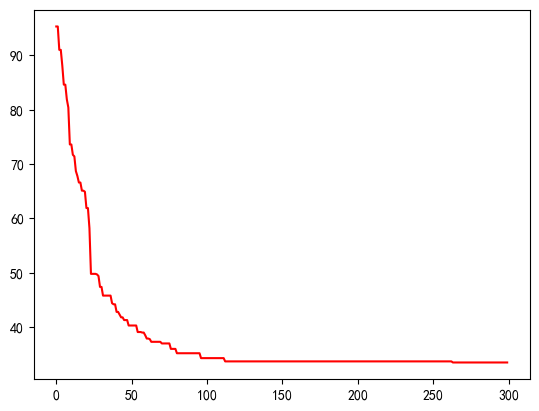

In [3]:
import math

import random  # 确保导入了random模块
from random import randrange
from random import choices
import numpy as np
geneNum = 100  # 种群数量
generationNum = 300  # 迭代次数


CENTER = 20 # 配送中心

# HUGE = 9999999
# PC = 1   #交叉率,没有定义交叉率，也就是说全部都要交叉，也就是1
PM = 0.1  # 变异率   以前是用的vary

n = 33 # 客户点数量
m = 2  # 换电站数量
k = 2  # 车辆数量
Q = 10 # 额定载重量, t

length = n+m+1

# 坐标   第0个换电站   1-14是顾客   16是图书馆 17到31是顾客       行驶距离要通过这个坐标自己来算
dis_net = [[0, 0.7, 1.4, 1.9, 3.0, 3.5, 0.6, 1.2, 1.8, 2.5, 3.1, 3.9, 0.9, 2.4, 2.9, 2.9, 3.2, 4.0, 2.0, 3.7, 4.4, 4.8, 5.3, 5.4, 2.5, 4.5, 5.1, 5.3, 5.9, 6.0, 3.3, 4.0, 4.6, 5.2, 5.6, 5.9],
[0.7, 0, 0.7, 1.2, 2.3, 2.8, 1.1, 0.5, 1.1, 1.8, 2.4, 3.2, 1.6, 1.7, 2.2, 2.2, 2.5, 3.3, 2.7, 3.5, 4.2, 4.6, 4.6, 4.7, 3.2, 4.3, 4.9, 5.1, 5.4, 5.3, 4.0, 4.7, 5.3, 5.7, 6.1, 5.8],
[1.4, 0.7, 0, 0.5, 1.6, 2.1, 1.8, 1.2, 0.4, 1.1, 1.7, 2.5, 2.1, 2.4, 1.5, 1.5, 1.8, 2.6, 3.2, 4.2, 3.7, 4.1, 3.9, 4.0, 3.7, 5.0, 4.4, 4.6, 4.7, 4.6, 4.5, 5.2, 5.4, 5.2, 5.4, 5.1],
[1.9, 1.2, 0.5, 0, 1.1, 1.6, 2.3, 1.7, 0.9, 0.9, 1.4, 2.0, 2.6, 2.9, 2.0, 1.3, 1.6, 2.4, 3.7, 4.7, 4.2, 4.5, 3.7, 3.8, 4.2, 5.5, 4.9, 5.1, 4.5, 4.4, 5.0, 5.7, 5.9, 5.7, 5.2, 4.9],
[3.0, 2.3, 1.6, 1.1, 0, 0.5, 3.4, 2.8, 2.0, 0.9, 0.3, 0.9, 3.7, 4.0, 3.1, 1.7, 1.4, 1.8, 4.8, 5.8, 5.3, 4.3, 3.5, 3.2, 5.3, 6.6, 6.0, 4.9, 4.3, 3.8, 6.1, 6.8, 7.0, 5.8, 4.6, 4.3],
[3.5, 2.8, 2.1, 1.6, 0.5, 0, 3.9, 3.3, 2.1, 1.4, 0.8, 0.4, 4.2, 4.5, 2.8, 1.8, 1.9, 1.3, 5.3, 6.3, 5.2, 4.8, 3.4, 2.7, 5.8, 7.1, 5.8, 5.3, 3.8, 3.3, 6.6, 7.3, 6.5, 5.5, 4.1, 3.8],
[0.6, 1.1, 2.0, 2.5, 3.3, 4.1, 0, 0.6, 1.7, 2.4, 3.0, 3.9, 0.3, 1.8, 2.8, 2.8, 3.1, 3.9, 1.4, 3.1, 3.8, 4.2, 5.0, 5.3, 1.9, 3.9, 4.5, 4.7, 5.3, 5.8, 2.7, 3.4, 4.0, 4.6, 5.0, 5.3],
[1.2, 0.5, 1.2, 1.7, 2.7, 3.3, 0.6, 0, 1.1, 1.8, 2.4, 3.3, 0.9, 1.2, 2.2, 2.2, 2.5, 3.3, 2.0, 3.0, 3.7, 4.1, 4.6, 4.7, 2.5, 3.8, 4.4, 4.6, 5.2, 5.3, 3.3, 4.0, 4.6, 5.2, 5.6, 5.8],
[1.8, 1.1, 0.4, 0.9, 1.6, 2.5, 1.7, 1.1, 0, 0.7, 1.3, 2.2, 2.0, 2.3, 1.1, 1.1, 1.4, 2.2, 3.1, 4.0, 3.3, 3.7, 3.5, 3.6, 3.6, 4.9, 4.0, 4.2, 4.3, 4.2, 4.4, 5.1, 5.0, 4.8, 5.0, 4.7],
[2.5, 1.8, 1.1, 0.9, 0.9, 1.9, 2.4, 1.8, 0.7, 0, 0.6, 1.5, 2.7, 3.0, 1.4, 0.4, 0.7, 1.5, 3.8, 4.7, 4.0, 3.6, 2.8, 2.9, 4.3, 5.5, 4.7, 4.2, 3.6, 3.5, 5.1, 5.8, 5.7, 5.1, 4.3, 4.0],
[3.1, 2.4, 1.7, 1.4, 0.3, 0.8, 3.0, 2.4, 1.3, 0.6, 0, 0.9, 3.3, 3.3, 2.0, 1.0, 1.1, 1.8, 4.4, 4.9, 4.2, 4.0, 3.2, 3.2, 4.9, 5.9, 4.9, 4.6, 4.0, 3.8, 5.7, 6.4, 5.9, 5.3, 4.6, 4.3],
[3.9, 3.2, 2.5, 2.0, 0.9, 0.4, 3.9, 3.3, 2.2, 1.5, 0.9, 0, 4.2, 4.2, 2.9, 1.9, 1.7, 0.9, 5.3, 5.8, 5.1, 4.6, 3.0, 2.3, 5.8, 6.6, 5.8, 4.8, 3.4, 2.9, 6.6, 7.3, 6.5, 4.9, 3.7, 3.4],
[0.9, 1.4, 2.1, 2.6, 3.6, 4.1, 0.3, 0.9, 2.0, 2.7, 3.3, 4.2, 0, 1.5, 2.8, 3.1, 3.4, 4.2, 1.1, 2.8, 3.5, 3.9, 4.7, 5.4, 1.6, 3.6, 4.2, 4.4, 5.0, 5.5, 2.4, 3.1, 3.7, 4.3, 4.7, 5.0],
[2.4, 1.7, 2.4, 2.9, 3.9, 4.4, 1.8, 1.2, 2.3, 2.7, 3.6, 4.3, 1.5, 0, 1.3, 2.3, 2.6, 3.4, 2.6, 1.8, 2.5, 2.9, 3.7, 4.4, 3.1, 2.6, 3.2, 3.4, 4.0, 4.5, 3.9, 3.6, 4.2, 4.0, 4.4, 4.7],
[2.9, 2.2, 1.5, 2.0, 2.7, 3.2, 2.8, 2.2, 1.1, 1.4, 2.4, 3.0, 2.8, 1.3, 0, 1.0, 1.3, 2.1, 3.9, 2.9, 2.2, 2.6, 3.4, 3.5, 4.4, 3.9, 2.9, 3.1, 3.7, 4.1, 5.2, 4.5, 3.9, 3.7, 4.1, 4.4],
[2.9, 2.2, 1.5, 1.3, 1.3, 1.8, 2.8, 2.2, 1.1, 0.4, 1.0, 1.9, 3.1, 2.3, 1.0, 0, 0.3, 1.1, 4.2, 3.9, 3.2, 3.2, 2.4, 2.5, 4.7, 4.7, 3.9, 3.8, 3.2, 3.1, 5.5, 5.5, 4.9, 4.7, 3.9, 3.6],
[3.2, 2.5, 1.8, 1.6, 1.4, 1.9, 3.1, 2.5, 1.4, 0.7, 1.1, 1.7, 3.4, 2.6, 1.3, 0.3, 0, 0.8, 4.5, 4.2, 3.5, 2.9, 2.1, 2.2, 5.0, 5.0, 4.2, 3.5, 2.9, 2.8, 5.8, 5.8, 5.2, 4.4, 3.6, 3.3],
[4.0, 3.3, 2.6, 2.4, 1.8, 1.3, 3.9, 3.3, 2.2, 1.5, 1.8, 0.9, 4.2, 3.4, 2.1, 1.1, 0.8, 0, 5.3, 5.0, 4.1, 3.7, 2.1, 1.4, 5.8, 5.8, 4.7, 4.2, 2.5, 2.0, 6.6, 6.6, 5.4, 4.8, 2.8, 2.5],
[2.0, 2.5, 3.2, 3.7, 4.7, 5.2, 1.4, 2.0, 3.1, 3.8, 4.4, 5.3, 1.1, 2.6, 3.9, 4.2, 4.5, 5.3, 0, 1.7, 2.4, 2.8, 3.6, 4.3, 0.5, 2.5, 3.1, 3.3, 3.9, 4.4, 1.3, 2.0, 2.6, 3.2, 3.6, 3.9],
[3.7, 3.5, 4.2, 4.7, 5.4, 5.9, 3.1, 3.0, 4.1, 4.5, 5.1, 6.0, 2.8, 1.8, 2.9, 4.1, 4.0, 4.0, 1.7, 0, 0.7, 1.1, 1.9, 2.6, 2.2, 0.8, 1.4, 1.6, 2.2, 2.7, 2.5, 1.8, 2.4, 2.2, 2.6, 2.9],
[4.4, 4.2, 3.7, 4.2, 4.5, 5.0, 3.8, 3.7, 3.3, 3.6, 4.2, 5.1, 3.5, 2.5, 2.2, 3.2, 3.3, 3.3, 2.4, 0.7, 0, 0.4, 1.2, 1.9, 2.9, 1.5, 0.7, 0.9, 1.5, 2.0, 3.2, 2.3, 1.7, 1.5, 1.9, 2.2],
[4.8, 4.6, 4.1, 4.6, 4.9, 5.4, 4.2, 4.1, 3.7, 4.0, 4.6, 5.5, 3.9, 2.9, 2.6, 3.6, 2.9, 2.9, 2.8, 1.1, 0.4, 0, 0.8, 1.5, 3.3, 1.9, 1.0, 0.5, 1.1, 1.6, 3.4, 2.7, 1.7, 1.1, 1.5, 1.8],
[5.3, 4.6, 3.9, 3.7, 3.5, 4.0, 5.0, 4.6, 3.5, 2.8, 3.2, 3.8, 4.7, 3.7, 3.4, 2.4, 2.1, 2.1, 3.6, 1.9, 1.2, 0.8, 0, 0.7, 4.1, 2.7, 1.8, 1.3, 0.8, 1.3, 4.2, 3.1, 2.5, 1.9, 1.9, 1.8],
[5.4, 4.7, 4.0, 3.8, 3.2, 2.7, 5.3, 4.7, 3.6, 2.9, 3.2, 2.3, 5.4, 4.4, 3.5, 2.5, 2.2, 1.4, 4.3, 2.6, 1.9, 1.5, 0.7, 0, 4.8, 3.4, 2.5, 2.0, 1.1, 0.6, 4.5, 3.8, 3.2, 2.6, 1.4, 1.1],
[2.5, 3.0, 3.7, 4.2, 5.2, 5.7, 1.9, 2.5, 3.6, 4.3, 4.9, 5.8, 1.6, 3.1, 4.4, 4.7, 5.0, 5.8, 0.5, 2.2, 2.9, 3.3, 4.1, 4.8, 0, 2.0, 3.0, 3.3, 4.1, 3.9, 0.8, 1.5, 2.1, 2.7, 3.1, 3.4],
[4.5, 4.3, 5.0, 5.5, 6.0, 6.1, 3.9, 3.8, 4.8, 5.1, 5.7, 5.7, 3.6, 2.6, 3.7, 4.7, 4.8, 4.8, 2.5, 0.8, 1.5, 1.9, 2.7, 3.2, 2.0, 0, 1.0, 1.5, 2.1, 2.6, 1.7, 1.0, 1.6, 2.1, 2.5, 2.8],
[5.1, 4.9, 4.4, 4.9, 5.2, 5.3, 4.5, 4.4, 4.0, 4.3, 4.9, 4.9, 4.2, 3.2, 2.9, 3.9, 4.0, 4.0, 3.1, 1.4, 0.7, 1.0, 1.9, 2.2, 3.0, 1.0, 0, 0.5, 1.1, 1.6, 2.7, 1.6, 1.0, 1.1, 1.5, 1.8],
[5.3, 5.1, 4.6, 5.0, 4.8, 4.7, 4.7, 4.6, 4.2, 4.1, 4.5, 4.3, 4.4, 3.4, 3.1, 3.7, 3.4, 3.4, 3.3, 1.6, 0.9, 0.5, 1.3, 1.7, 3.5, 1.5, 0.5, 0, 0.6, 1.1, 2.8, 2.1, 1.2, 0.6, 1.0, 1.3],
[5.9, 5.4, 4.7, 4.5, 4.3, 4.2, 5.3, 5.2, 4.3, 3.6, 4.0, 3.8, 5.0, 4.0, 3.7, 3.2, 2.9, 2.9, 3.9, 2.2, 1.5, 1.1, 0.8, 1.1, 4.1, 2.1, 1.1, 0.6, 0, 0.5, 3.4, 2.4, 1.8, 1.2, 1.1, 1.0],
[6.0, 5.3, 4.6, 4.4, 3.8, 3.3, 5.8, 5.3, 4.2, 3.5, 3.8, 2.9, 5.5, 4.5, 4.1, 3.1, 2.8, 2.0, 4.4, 2.7, 2.0, 1.6, 1.3, 0.6, 4.6, 2.6, 1.6, 1.1, 0.5, 0, 3.6, 2.9, 2.3, 1.7, 0.8, 0.5],
[3.3, 3.8, 4.5, 5.0, 6.0, 6.5, 2.7, 3.3, 4.4, 5.1, 5.7, 6.6, 2.4, 3.9, 5.2, 5.5, 5.8, 6.6, 1.3, 3.0, 3.7, 4.1, 4.9, 5.3, 0.8, 1.7, 2.3, 2.5, 3.4, 3.1, 0, 0.7, 1.3, 1.9, 2.3, 2.6],
[4.0, 4.5, 5.2, 5.7, 6.7, 6.9, 3.4, 4.0, 5.1, 5.8, 6.4, 6.5, 3.1, 3.6, 4.7, 5.7, 5.8, 5.6, 2.0, 1.8, 2.5, 2.9, 3.7, 4.2, 1.5, 1.0, 1.6, 1.8, 2.7, 2.4, 0.7, 0, 0.6, 1.2, 1.6, 1.9],
[4.6, 5.1, 5.4, 5.9, 6.2, 5.9, 4.0, 4.6, 5.0, 5.3, 5.9, 5.5, 3.7, 4.2, 3.9, 4.9, 4.9, 4.6, 2.6, 2.4, 1.7, 2.0, 2.8, 3.2, 2.1, 1.6, 1.0, 1.2, 2.1, 1.8, 1.3, 0.6, 0, 0.6, 1.0, 1.3],
[5.2, 5.7, 5.2, 5.6, 5.4, 5.0, 4.6, 5.2, 4.8, 4.7, 5.1, 4.6, 4.3, 4.0, 3.7, 4.3, 4.0, 3.7, 3.2, 2.2, 1.5, 1.1, 1.9, 2.3, 2.7, 2.1, 1.1, 0.6, 1.2, 1.2, 1.9, 1.2, 0.6, 0, 0.4, 0.7],
[5.6, 6.1, 5.6, 5.6, 5.4, 4.9, 5.0, 5.6, 5.2, 4.7, 5.1, 4.5, 4.7, 4.4, 4.1, 4.3, 4.0, 3.6, 3.6, 2.6, 1.9, 1.5, 1.9, 2.2, 3.1, 2.5, 1.5, 1.0, 1.1, 0.8, 2.3, 1.6, 1.0, 0.4, 0, 0.3],
[5.9, 5.8, 5.1, 4.9, 4.3, 3.8, 5.3, 5.8, 4.7, 4.0, 4.3, 3.4, 5.0, 4.7, 4.4, 3.6, 3.3, 2.5, 3.9, 2.9, 2.2, 1.8, 1.8, 1.1, 3.4, 2.8, 1.8, 1.3, 1.0, 0.5, 2.6, 1.9, 1.3, 0.7, 0.3, 0]]

# 需求量
t = [0, 6, 4, 7, 5, 3, 3, 5, 3, 4, 3, 4, 4, 2, 0, 2, 8, 2, 2, 4, 0, 0, 3, 1, 5, 3, 6, 5, 6, 5, 6, 6, 2, 6, 2, 0]
def getGene(length):   
    ##先产生一个无序的列表
    data = list(range(1,length))  ##先产生一个有序的列表
    np.random.shuffle(data)   ##有序列表打乱成无序列表
    data.insert(0, CENTER)    ##在开始插入0
    data.append(CENTER)       ##在结尾插入0
    
    #再插入车
    sum = 0
    newData = []
    for index, pos in enumerate(data):
        sum += t[pos]
        if sum > Q:
            newData.append(CENTER)
            sum = t[pos]
        newData.append(pos)

    return newData
def getpop(length,geneNum):
    pop = []
    for i in range(geneNum):
        gene = getGene(length)
       
        pop.append(gene)
    return pop
##计算一个个体的适应度值
def getfit(gene):
    distCost = 0
    dist = []  # from this to next
    # 计算距离
    i = 1
    while i < len(gene):
        
        dist.append(dis_net[gene[i]][gene[i - 1]])
        i += 1
    # 距离成本
    distCost = sum(dist)     #总行驶距离
    fit = 1/distCost   ##fitness越小表示越优秀，被选中的概率越大，
    return fit
##得到整个种群的适应度列表
def getfitness(pop):
    fitness = []
    for gene in pop:
        fit = getfit(gene)
        fitness.append(fit)
    return np.array(fitness)
def select(pop,fitness):
    fitness = fitness / fitness.sum()  # 归一化
    idx = np.array(list(range(geneNum)))
    pop_idx = np.random.choice(idx, size=geneNum, p=fitness)  # 根据概率选择
    for i in range(geneNum):
        pop[i] = pop[pop_idx[i]]
    return pop
#选择路径
def moveRandSubPathLeft(gene):
   
    path = randrange(k)  # 选择路径索引，随机分成k段
    print('path:',path)
    try:
        index = gene.index(CENTER, path+1) #移动到所选索引
        # move first CENTER
        locToInsert = 0
        gene.insert(locToInsert, gene.pop(index))
        index += 1
        locToInsert += 1
        # move data after CENTER
        print('index:',index)
        try:
            print('len(gene):',len(gene))
            while gene[index] != CENTER:
                gene.insert(locToInsert, gene.pop(index))
                index += 1
                print('执行完index+1,index=',index)
                locToInsert += 1
            return gene
            # assert(length+k == len(gene))
        except:
            print('出错啦，index:',index)
            return gene
    except:
        print('0 is not in list',gene)
        return gene
# 选择复制，选择适应度最高的前 1/3，进行后面的交叉
def choose1(pop):
    num = int(geneNum/6) * 2    # 选择偶数个，方便下一步交叉
    # sort genes with respect to chooseProb
    key = lambda gene: getfit(gene)
    pop.sort(reverse=True, key=key)      ##那就是说按照适应度函数降序排序,选了适应度值最高的那1/3
    # return shuffled top 1/3   
    return pop[0:num]
##交叉一对
def crossPair(i,gene1, gene2, crossedGenes):
    gene1 = moveRandSubPathLeft(gene1)
    gene2 = moveRandSubPathLeft(gene2)
    newGene1 = []
    newGene2 = []
    # copy first paths
    centers = 0
    firstPos1 = 1
    for pos in gene1:
        firstPos1 += 1
        centers += (pos == CENTER)
        newGene1.append(pos)
        if centers >= 2:
            break
    centers = 0
    firstPos2 = 1
    for pos in gene2:
        firstPos2 += 1
        centers += (pos == CENTER)
        newGene2.append(pos)
        if centers >= 2:
            break
    # copy data not exits in father gene
    for pos in gene2:
        if pos not in newGene1:
            newGene1.append(pos)
    for pos in gene1:
        if pos not in newGene2:
            newGene2.append(pos)
    # add center at end
    newGene1.append(CENTER)
    newGene2.append(CENTER)
    # 计算适应度最高的
    key1 = lambda gene1: getfit(gene1)
    possible1 = []
    try:
        while gene1[firstPos1] != CENTER:
            newGene = newGene1.copy()
            newGene.insert(firstPos1, CENTER)
            possible1.append(newGene)
            firstPos1 += 1
        print('第{}位置:{}'.format(i,len(possible1)))
        if len(possible1) == 0:
            crossedGenes.append(newGene1)
        else:
            possible1.sort(reverse=True, key=key1)
            crossedGenes.append(possible1[0])
    except:
        print('交叉出错啦：firstPos1', firstPos1)

    key2 = lambda gene2: getfit(gene2)
    possible2 = []
    try:
        while gene2[firstPos2] != CENTER:
            newGene = newGene2.copy()
            newGene.insert(firstPos2, CENTER)
            possible2.append(newGene)
            firstPos2 += 1
        print('第{}:{}'.format(i,len(possible2)))
        if len(possible2) == 0:
            crossedGenes.append(newGene2)
        else:
            possible2.sort(reverse=True, key=key2)
            crossedGenes.append(possible2[0])
        print('交叉完成第：', i)
    except:
        print('交叉出错啦：',i)

# 交叉
def cross1(genes):
    crossedGenes = []
    for i in range(0, len(genes), 2):
        # print('gene[i]:',genes[i])
        # print('gene[i+1]:', genes[i])
        crossPair(i,genes[i], genes[i+1], crossedGenes)
        print('交叉完成')
    return crossedGenes

# 合并
def mergeGenes(genes, crossedGenes):
    # sort genes with respect to chooseProb
    key = lambda gene: getfit(gene)
    genes.sort(reverse=True, key=key)    ##先把原来的种群100按照适应度降序排列，然后，将交叉得到的32个个体替换到种群的最后32个
    pos = geneNum - 1
    for gene in crossedGenes:
        genes[pos] = gene
        pos -= 1
    return  genes


def varyOne(gene):
    varyNum = 10    
    variedGenes = []
    for i in range(varyNum):       # 先按照这种方法变异10个，选择适应度最高的那个作为变异完的子代
        p1, p2 = choices(list(range(1,len(gene)-2)), k=2)
        newGene = gene.copy()
        newGene[p1], newGene[p2] = newGene[p2], newGene[p1] # 交换
        variedGenes.append(newGene)
    key = lambda gene: getfit(gene)
    variedGenes.sort(reverse=True, key=key)
    return variedGenes[0]

# 变异
def vary(genes):
    for index, gene in enumerate(genes):
        # 精英主义，保留前三十，这个意思就是前三十个一定不变异，到后面的个体才按照变异概率来变异
        if index < 30:
            continue
        if np.random.rand() < PM:
            genes[index] = varyOne(gene)
    return genes


from tqdm import *  # 进度条
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

best_fitness = []
min_cost = []
J = []
pop = getpop(length, geneNum)  # 初始种群
# 迭代
for j in tqdm(range(generationNum)):
    print('j=',j)
    chosen_pop = choose1(pop)   # 选择   选择适应度值最高的前三分之一，也就是32个种群，进行下一步的交叉
    crossed_pop = cross1(chosen_pop)   # 交叉
    pop = mergeGenes(pop, crossed_pop) # 复制交叉至子代种群
    pop = vary(pop) # under construction
    key = lambda gene: getfit(gene)
    pop.sort(reverse=True, key=key)  # 以fit对种群排序
    cost = 1/getfit(pop[0])
    print(cost)
    min_cost.append(cost)
    J.append(j)
print(J)
print(min_cost)


# key = lambda gene: getfit(gene)
# pop.sort(reverse=True, key=key)   # 以fit对种群排序
print('\r\n')
print('data:', pop[0])
print('fit:', 1/getfit(pop[0]))
plt.plot(J,min_cost, color='r')
plt.show()


In [13]:
import math
import random

import numpy as np
import pandas as pd
import folium
import os
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 添加这条可以让图形显示中文

#####对一系列装卸货点进行适当的路径规划，在满足约束条件（客户需求、车辆载重和容积、车型、车辆行驶里程、配送时间窗、配送中心数量等限制）
# 和目标最优化（路程最短、成本最低、使用车辆数最少、配送时间最快等）下，将客户的配送需求从配送中心送达客户点，或从客户点送回配送中心。

# def calDistance(CityCoordinates):
#     '''
#     计算城市间距离
#     输入：CityCoordinates-城市坐标；
#     输出：城市间距离矩阵-dis_matrix
#     '''
#     dis_matrix = pd.DataFrame(data=None, columns=range(len(CityCoordinates)), index=range(len(CityCoordinates)))
#     for i in range(len(CityCoordinates)):
#         xi, yi = CityCoordinates[i][0], CityCoordinates[i][1]
#         for j in range(len(CityCoordinates)):
#             xj, yj = CityCoordinates[j][0], CityCoordinates[j][1]
#             dis_matrix.iloc[i, j] = round(math.sqrt((xi - xj) ** 2 + (yi - yj) ** 2), 2)
#     return dis_matrix

def car_type_data(car_type):
    # 车辆参数
    CAPACITY = 0  # 车辆最大容量
    C0 = 0  # 车辆启动成本
    C1 = 0  # 车辆单位距离行驶成本

    if car_type == 0:
        CAPACITY = 10
       
    
    if car_type == 1:
        CAPACITY = 20
       
        
    return CAPACITY


def greedy(CityCoordinates, dis_matrix):
    '''
    贪婪策略构造初始解,初始化时将VRP简化为TSP进行构造。
    输入：CityCoordinates-节点坐标,dis_matrix-距离矩阵
    输出：初始解-line
    '''
    # 修改dis_matrix以适应求解需要
    dis_matrix = dis_matrix.astype('float64')
    for i in range(len(CityCoordinates)):
        dis_matrix.loc[i, i] = math.pow(10, 10)
    dis_matrix.loc[:, 0] = math.pow(10, 10)  # 0不在编码内
    line = []  # 初始化
    now_city = random.randint(1, len(CityCoordinates) - 1)  # 随机生成出发城市
    line.append(now_city)  # 添加当前城市到路径
    dis_matrix.loc[:, now_city] = math.pow(10, 10)  # 更新距离矩阵，已经过城市不再被取出
    for i in range(1, len(CityCoordinates) - 1):
        next_city = dis_matrix.loc[now_city, :].idxmin()  # 距离最近的城市
        line.append(next_city)  # 添加进路径
        dis_matrix.loc[:, next_city] = math.pow(10, 10)  # 更新距离矩阵
        now_city = next_city  # 更新当前城市

    return line


def calFitness(birdPop, Demand, dis_matrix, DISTABCE, V):
    '''
    贪婪策略分配车辆（解码），计算路径距离（评价函数）
    输入：birdPop-路径，Demand-客户需求,dis_matrix-城市间距离矩阵，CAPACITY-车辆最大载重,DISTABCE-车辆最大行驶距离,C0-车辆启动成本,C1-车辆单位距离行驶成本；
    输出：birdPop_car-分车后路径,fits-适应度
    '''
    birdPop_car, fits , birdPop_car_type, birdPop_car_dis = [], [], [], []  # 初始化
    times, moneys = [], []
    for j in range(len(birdPop)):
        bird = birdPop[j]
        lines = []  # 存储线路分车
        line = [0]  # 每辆车服务客户点
        car_types = []  # 存储线路分车的车型
        dis_sum = []  # 线路上的路径距离
        time_car = []  # 线路上各路径所需时间
        dis, d = 0, 0  # 当前客户距离前一个客户的距离、当前客户需求量
        i = 0  # 指向配送中心
        time_point = 0
        car_type = 0  # 所需车型
        # 车辆参数
        CAPACITY = 0  # 车辆最大容量
     
        while i < len(bird):

            if dis >= 4.5:
                car_type = 1
            else
                car_type = 0

            

           
            if car_type == 0:
                CAPACITY = car_type_data(car_type)
                if line == [0]:  # 车辆未分配客户点
                    dis += dis_matrix.loc[0, bird[i]]  # 记录距离
                    line.append(bird[i])  # 为客户点分车
                    d += Demand[bird[i]]  # 记录需求量
                    time_point += dis_matrix.loc[0, bird[i]] / V
                    
                    i += 1  # 指向下一个客户点
                else:  # 已分配客户点则需判断车辆载重和行驶距离
                    if (dis_matrix.loc[line[-1], bird[i]] + dis_matrix.loc[bird[i], 0] + dis <= DISTABCE) & (
                            d + Demand[bird[i]] <= CAPACITY):
                        dis += dis_matrix.loc[line[-1], bird[i]]
                        line.append(bird[i])
                        d += Demand[bird[i]]
                        time_point += dis_matrix.loc[line[-1], bird[i]] / V
                        
                        i += 1
                    else:
                        dis += dis_matrix.loc[line[-1], 0]  # 当前车辆装满
                        time_point += dis_matrix.loc[line[-1], 0] / V
                     
                        line.append(0)
                        dis_sum.append(dis)
                        lines.append(line)
                        car_types.append(car_type)
                        time_car.append(round(time_point, 3))
                        
                        # 下一辆车
                        dis, d = 0, 0
                        time_point = 0
                        line = [0]
            if car_type == 1:
                CAPACITY = car_type_data(car_type)
                if line == [0]:  # 车辆未分配客户点
                    dis += dis_matrix.loc[0, bird[i]]  # 记录距离
                    line.append(bird[i])  # 为客户点分车
                    d += Demand[bird[i]]  # 记录需求量
                    time_point += dis_matrix.loc[0, bird[i]] / V
                 
                    i += 1  # 指向下一个客户点
                else:  # 已分配客户点则需判断车辆载重和行驶距离
                    if (dis_matrix.loc[line[-1], bird[i]] + dis_matrix.loc[bird[i], 0] + dis <= DISTABCE) & (
                            d + Demand[bird[i]] <= CAPACITY):
                        dis += dis_matrix.loc[line[-1], bird[i]]
                        line.append(bird[i])
                        d += Demand[bird[i]]
                        time_point += dis_matrix.loc[line[-1], bird[i]] / V
                       
                        i += 1
                    else:
                        dis += dis_matrix.loc[line[-1], 0]  # 当前车辆装满
                        time_point += dis_matrix.loc[line[-1], 0] / V
                     
                        line.append(0)
                        dis_sum.append(dis)
                        lines.append(line)
                        car_types.append(car_type)
                        time_car.append(round(time_point, 3))
                        
                        # 下一辆车
                        dis, d = 0, 0
                        time_point = 0
                        line = [0]

        # 最后一辆车
        dis += dis_matrix.loc[line[-1], 0]
        time_point += dis_matrix.loc[line[-1], 0] / V
       
        line.append(0)
        dis_sum.append(round(dis, 3))
        lines.append(line)
        car_types.append(car_type)
        time_car.append(round(time_point, 3))
     

        birdPop_car.append(lines)
        birdPop_car_type.append(car_types)
        birdPop_car_dis.append(dis_sum)
        times.append(time_car)
        

    return birdPop_car, fits, birdPop_car_type, birdPop_car_dis, times,


def crossover(bird, pLine, gLine, w, c1, c2):
    '''
    采用顺序交叉方式；交叉的parent1为粒子本身，分别以w/(w+c1+c2),c1/(w+c1+c2),c2/(w+c1+c2)
    的概率接受粒子本身逆序、当前最优解、全局最优解作为parent2,只选择其中一个作为parent2；
    输入：bird-粒子,pLine-当前最优解,gLine-全局最优解,w-惯性因子,c1-自我认知因子,c2-社会认知因子；
    输出：交叉后的粒子-croBird；
    '''
    croBird = [None] * len(bird)  # 初始化
    parent1 = bird  # 选择parent1
    # 选择parent2（轮盘赌操作）
    randNum = random.uniform(0, sum([w, c1, c2]))
    if randNum <= w:
        parent2 = [bird[i] for i in range(len(bird) - 1, -1, -1)]  # bird的逆序
    elif randNum <= w + c1:
        parent2 = pLine
    else:
        parent2 = gLine

    # parent1-> croBird
    start_pos = random.randint(0, len(parent1) - 1)
    end_pos = random.randint(0, len(parent1) - 1)
    if start_pos > end_pos: start_pos, end_pos = end_pos, start_pos
    croBird[start_pos:end_pos + 1] = parent1[start_pos:end_pos + 1].copy()

    # parent2 -> croBird
    list2 = list(range(0, start_pos))
    list1 = list(range(end_pos + 1, len(parent2)))
    list_index = list1 + list2  # croBird从后往前填充
    j = -1
    for i in list_index:
        for j in range(j + 1, len(parent2) + 1):
            if parent2[j] not in croBird:
                croBird[i] = parent2[j]
                break

    return croBird


def draw_path(car_routes, CityCoordinates):
    '''
    #画路径图
    输入：line-路径，CityCoordinates-城市坐标；
    输出：路径图
    '''
    # for route in car_routes:
    #     x, y = [], []
    #     for i in route:
    #         Coordinate = CityCoordinates[i]
    #         x.append(Coordinate[0])
    #         y.append(Coordinate[1])
    #     x.append(x[0])
    #     y.append(y[0])
    #     plt.plot(x, y, 'o-', alpha=0.8, linewidth=0.8)
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.show()

    m = folium.Map(location=[30.29924, 120.809512], zoom_start=10,
                   tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=7&x={x}&y={y}&z={z}',
                   attr='default'
                   )  # 中心区域的确定

    color = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'gray', 'black', 'pink']
    l = []
    location = []
    p = car_routes

    for point in p:
        for i in point:
            a = CityCoordinates[i]
            l.append([a[1], a[0]])
        location.append(l)
        l = []
    # print(location)

    for i in range(len(location)):
        loca = location[i]
        point = p[i]
        # print(loca)
        # print(len(loca))
        # print(point)
        # print(len(point))
        for j in range(len(loca)):
            # print("第{}号点的坐标为{}".format(point[j], loca[j]))
            folium.CircleMarker(location=[loca[j][0], loca[j][1]],
                                radius=4, popup=point[j],
                                color='black', fill=True,
                                fill_color='orange').add_to(m)

    for i in range(len(location)):
        route = folium.PolyLine(  # polyline方法为将坐标用线段形式连接起来
            location[i],  # 将坐标点连接起来
            weight=3,  # 线的大小为3
            color=color[i],  # 线的颜色为橙色
            popup=i,
            opacity=0.8  # 线的透明度
        ).add_to(m)

    m.save(os.path.join(r'C:/', 'cvrp.html'))  # 将结果以HTML形式保存到桌面上


if __name__ == '__main__':
    # 车辆参数
    # CAPACITY = 23  # 车辆最大容量
    DISTABCE = 1000  # 车辆最大行驶距离
    V = 60  # 速度，km/h
    # C0 = 220.8  # 车辆启动成本
    # C1 = 2.314  # 车辆单位距离行驶成本

    # PSO参数
    birdNum = 50  # 粒子数量
    w = 0.2  # 惯性因子
    c1 = 0.4  # 自我认知因子
    c2 = 0.4  # 社会认知因子
    pBest, pLine = 0, []  # 当前最优值、当前最优解，（自我认知部分）
    gBest, gLine = 0, []  # 全局最优值、全局最优解，（社会认知部分）

    # 其他参数
    iterMax = 10000  # 迭代次数
    iterI = 1  # 当前迭代次数
    bestfit = []  # 记录每代最优值

    # 读入数据,
    # DistributionCenter = #配送中心
    # Customer = [(50, 50), (96, 24), (40, 5), (49, 8), (13, 7), (29, 89), (48, 30), (84, 39), (14, 47), (2, 24),
    #             (3, 82), (65, 10), (98, 52), (84, 25), (41, 69), (1, 65),
    #             (51, 71), (75, 83), (29, 32), (83, 3), (50, 93), (80, 94), (5, 42), (62, 70), (31, 62), (19, 97),
    #             (91, 75), (27, 49), (23, 15), (20, 70), (85, 60), (98, 85)]  #客户坐标点

    Customer = [(120.809512, 30.29924), (119.788449, 30.769), (119.782318, 30.777408), (119.712324, 30.665222),
                (119.623712, 30.829714), (119.384080, 30.571701), (119.680676, 30.659247), (119.670816, 30.665036),
                (119.680353, 30.638675), (119.686617, 30.631837), (119.782318, 30.777408), (120.258767, 30.843226),
                (119.676461, 30.656651), (119.782318, 30.777408), (119.782318, 30.777408), (119.389073, 30.575829),
                (119.566473, 30.598395), (119.569681, 30.582537), (119.698264, 30.617036), (119.645151, 30.774609),
                (119.782318, 30.777408), (119.566420, 30.598355), (119.678924, 30.657969), (119.697415, 30.63885),
                (119.659394, 30.632242), (119.621393, 30.519815), (119.697276, 30.604234), (119.686536, 30.63874),
                (119.690617, 30.637546)]  # 客户坐标点


    # Demand = [0, 16, 11, 6, 10, 7, 12, 16, 6, 16, 8, 14, 7, 16, 3, 22, 18, 19, 1, 14, 8, 12, 4, 8, 24, 24, 2, 10, 15, 2,
    #           14, 9]  #客户需求量

    # 客户需求量
    Demand = [0, 2.5589375, 3.738, 1.067967742, 3.427, 6.6375, 0.063, 22.21635484, 2.3545, 7.4145, 5.3415, 3.38,
              8.2278, 3.848125, 0.021, 2.4405, 10.7832, 3.26, 0.1295, 9.175, 3.10475, 3.0318, 10.5865, 3.833,
              2.538461538, 3.228, 5.507928571, 0.5388, 0.576]

    
    
    dis_matrix = [[0, 0.7, 1.4, 1.9, 3.0, 3.5, 0.6, 1.2, 1.8, 2.5, 3.1, 3.9, 0.9, 2.4, 2.9, 2.9, 3.2, 4.0, 2.0, 3.7, 4.4, 4.8, 5.3, 5.4, 2.5, 4.5, 5.1, 5.3, 5.9, 6.0, 3.3, 4.0, 4.6, 5.2, 5.6, 5.9],
[0.7, 0, 0.7, 1.2, 2.3, 2.8, 1.1, 0.5, 1.1, 1.8, 2.4, 3.2, 1.6, 1.7, 2.2, 2.2, 2.5, 3.3, 2.7, 3.5, 4.2, 4.6, 4.6, 4.7, 3.2, 4.3, 4.9, 5.1, 5.4, 5.3, 4.0, 4.7, 5.3, 5.7, 6.1, 5.8],
[1.4, 0.7, 0, 0.5, 1.6, 2.1, 1.8, 1.2, 0.4, 1.1, 1.7, 2.5, 2.1, 2.4, 1.5, 1.5, 1.8, 2.6, 3.2, 4.2, 3.7, 4.1, 3.9, 4.0, 3.7, 5.0, 4.4, 4.6, 4.7, 4.6, 4.5, 5.2, 5.4, 5.2, 5.4, 5.1],
[1.9, 1.2, 0.5, 0, 1.1, 1.6, 2.3, 1.7, 0.9, 0.9, 1.4, 2.0, 2.6, 2.9, 2.0, 1.3, 1.6, 2.4, 3.7, 4.7, 4.2, 4.5, 3.7, 3.8, 4.2, 5.5, 4.9, 5.1, 4.5, 4.4, 5.0, 5.7, 5.9, 5.7, 5.2, 4.9],
[3.0, 2.3, 1.6, 1.1, 0, 0.5, 3.4, 2.8, 2.0, 0.9, 0.3, 0.9, 3.7, 4.0, 3.1, 1.7, 1.4, 1.8, 4.8, 5.8, 5.3, 4.3, 3.5, 3.2, 5.3, 6.6, 6.0, 4.9, 4.3, 3.8, 6.1, 6.8, 7.0, 5.8, 4.6, 4.3],
[3.5, 2.8, 2.1, 1.6, 0.5, 0, 3.9, 3.3, 2.1, 1.4, 0.8, 0.4, 4.2, 4.5, 2.8, 1.8, 1.9, 1.3, 5.3, 6.3, 5.2, 4.8, 3.4, 2.7, 5.8, 7.1, 5.8, 5.3, 3.8, 3.3, 6.6, 7.3, 6.5, 5.5, 4.1, 3.8],
[0.6, 1.1, 2.0, 2.5, 3.3, 4.1, 0, 0.6, 1.7, 2.4, 3.0, 3.9, 0.3, 1.8, 2.8, 2.8, 3.1, 3.9, 1.4, 3.1, 3.8, 4.2, 5.0, 5.3, 1.9, 3.9, 4.5, 4.7, 5.3, 5.8, 2.7, 3.4, 4.0, 4.6, 5.0, 5.3],
[1.2, 0.5, 1.2, 1.7, 2.7, 3.3, 0.6, 0, 1.1, 1.8, 2.4, 3.3, 0.9, 1.2, 2.2, 2.2, 2.5, 3.3, 2.0, 3.0, 3.7, 4.1, 4.6, 4.7, 2.5, 3.8, 4.4, 4.6, 5.2, 5.3, 3.3, 4.0, 4.6, 5.2, 5.6, 5.8],
[1.8, 1.1, 0.4, 0.9, 1.6, 2.5, 1.7, 1.1, 0, 0.7, 1.3, 2.2, 2.0, 2.3, 1.1, 1.1, 1.4, 2.2, 3.1, 4.0, 3.3, 3.7, 3.5, 3.6, 3.6, 4.9, 4.0, 4.2, 4.3, 4.2, 4.4, 5.1, 5.0, 4.8, 5.0, 4.7],
[2.5, 1.8, 1.1, 0.9, 0.9, 1.9, 2.4, 1.8, 0.7, 0, 0.6, 1.5, 2.7, 3.0, 1.4, 0.4, 0.7, 1.5, 3.8, 4.7, 4.0, 3.6, 2.8, 2.9, 4.3, 5.5, 4.7, 4.2, 3.6, 3.5, 5.1, 5.8, 5.7, 5.1, 4.3, 4.0],
[3.1, 2.4, 1.7, 1.4, 0.3, 0.8, 3.0, 2.4, 1.3, 0.6, 0, 0.9, 3.3, 3.3, 2.0, 1.0, 1.1, 1.8, 4.4, 4.9, 4.2, 4.0, 3.2, 3.2, 4.9, 5.9, 4.9, 4.6, 4.0, 3.8, 5.7, 6.4, 5.9, 5.3, 4.6, 4.3],
[3.9, 3.2, 2.5, 2.0, 0.9, 0.4, 3.9, 3.3, 2.2, 1.5, 0.9, 0, 4.2, 4.2, 2.9, 1.9, 1.7, 0.9, 5.3, 5.8, 5.1, 4.6, 3.0, 2.3, 5.8, 6.6, 5.8, 4.8, 3.4, 2.9, 6.6, 7.3, 6.5, 4.9, 3.7, 3.4],
[0.9, 1.4, 2.1, 2.6, 3.6, 4.1, 0.3, 0.9, 2.0, 2.7, 3.3, 4.2, 0, 1.5, 2.8, 3.1, 3.4, 4.2, 1.1, 2.8, 3.5, 3.9, 4.7, 5.4, 1.6, 3.6, 4.2, 4.4, 5.0, 5.5, 2.4, 3.1, 3.7, 4.3, 4.7, 5.0],
[2.4, 1.7, 2.4, 2.9, 3.9, 4.4, 1.8, 1.2, 2.3, 2.7, 3.6, 4.3, 1.5, 0, 1.3, 2.3, 2.6, 3.4, 2.6, 1.8, 2.5, 2.9, 3.7, 4.4, 3.1, 2.6, 3.2, 3.4, 4.0, 4.5, 3.9, 3.6, 4.2, 4.0, 4.4, 4.7],
[2.9, 2.2, 1.5, 2.0, 2.7, 3.2, 2.8, 2.2, 1.1, 1.4, 2.4, 3.0, 2.8, 1.3, 0, 1.0, 1.3, 2.1, 3.9, 2.9, 2.2, 2.6, 3.4, 3.5, 4.4, 3.9, 2.9, 3.1, 3.7, 4.1, 5.2, 4.5, 3.9, 3.7, 4.1, 4.4],
[2.9, 2.2, 1.5, 1.3, 1.3, 1.8, 2.8, 2.2, 1.1, 0.4, 1.0, 1.9, 3.1, 2.3, 1.0, 0, 0.3, 1.1, 4.2, 3.9, 3.2, 3.2, 2.4, 2.5, 4.7, 4.7, 3.9, 3.8, 3.2, 3.1, 5.5, 5.5, 4.9, 4.7, 3.9, 3.6],
[3.2, 2.5, 1.8, 1.6, 1.4, 1.9, 3.1, 2.5, 1.4, 0.7, 1.1, 1.7, 3.4, 2.6, 1.3, 0.3, 0, 0.8, 4.5, 4.2, 3.5, 2.9, 2.1, 2.2, 5.0, 5.0, 4.2, 3.5, 2.9, 2.8, 5.8, 5.8, 5.2, 4.4, 3.6, 3.3],
[4.0, 3.3, 2.6, 2.4, 1.8, 1.3, 3.9, 3.3, 2.2, 1.5, 1.8, 0.9, 4.2, 3.4, 2.1, 1.1, 0.8, 0, 5.3, 5.0, 4.1, 3.7, 2.1, 1.4, 5.8, 5.8, 4.7, 4.2, 2.5, 2.0, 6.6, 6.6, 5.4, 4.8, 2.8, 2.5],
[2.0, 2.5, 3.2, 3.7, 4.7, 5.2, 1.4, 2.0, 3.1, 3.8, 4.4, 5.3, 1.1, 2.6, 3.9, 4.2, 4.5, 5.3, 0, 1.7, 2.4, 2.8, 3.6, 4.3, 0.5, 2.5, 3.1, 3.3, 3.9, 4.4, 1.3, 2.0, 2.6, 3.2, 3.6, 3.9],
[3.7, 3.5, 4.2, 4.7, 5.4, 5.9, 3.1, 3.0, 4.1, 4.5, 5.1, 6.0, 2.8, 1.8, 2.9, 4.1, 4.0, 4.0, 1.7, 0, 0.7, 1.1, 1.9, 2.6, 2.2, 0.8, 1.4, 1.6, 2.2, 2.7, 2.5, 1.8, 2.4, 2.2, 2.6, 2.9],
[4.4, 4.2, 3.7, 4.2, 4.5, 5.0, 3.8, 3.7, 3.3, 3.6, 4.2, 5.1, 3.5, 2.5, 2.2, 3.2, 3.3, 3.3, 2.4, 0.7, 0, 0.4, 1.2, 1.9, 2.9, 1.5, 0.7, 0.9, 1.5, 2.0, 3.2, 2.3, 1.7, 1.5, 1.9, 2.2],
[4.8, 4.6, 4.1, 4.6, 4.9, 5.4, 4.2, 4.1, 3.7, 4.0, 4.6, 5.5, 3.9, 2.9, 2.6, 3.6, 2.9, 2.9, 2.8, 1.1, 0.4, 0, 0.8, 1.5, 3.3, 1.9, 1.0, 0.5, 1.1, 1.6, 3.4, 2.7, 1.7, 1.1, 1.5, 1.8],
[5.3, 4.6, 3.9, 3.7, 3.5, 4.0, 5.0, 4.6, 3.5, 2.8, 3.2, 3.8, 4.7, 3.7, 3.4, 2.4, 2.1, 2.1, 3.6, 1.9, 1.2, 0.8, 0, 0.7, 4.1, 2.7, 1.8, 1.3, 0.8, 1.3, 4.2, 3.1, 2.5, 1.9, 1.9, 1.8],
[5.4, 4.7, 4.0, 3.8, 3.2, 2.7, 5.3, 4.7, 3.6, 2.9, 3.2, 2.3, 5.4, 4.4, 3.5, 2.5, 2.2, 1.4, 4.3, 2.6, 1.9, 1.5, 0.7, 0, 4.8, 3.4, 2.5, 2.0, 1.1, 0.6, 4.5, 3.8, 3.2, 2.6, 1.4, 1.1],
[2.5, 3.0, 3.7, 4.2, 5.2, 5.7, 1.9, 2.5, 3.6, 4.3, 4.9, 5.8, 1.6, 3.1, 4.4, 4.7, 5.0, 5.8, 0.5, 2.2, 2.9, 3.3, 4.1, 4.8, 0, 2.0, 3.0, 3.3, 4.1, 3.9, 0.8, 1.5, 2.1, 2.7, 3.1, 3.4],
[4.5, 4.3, 5.0, 5.5, 6.0, 6.1, 3.9, 3.8, 4.8, 5.1, 5.7, 5.7, 3.6, 2.6, 3.7, 4.7, 4.8, 4.8, 2.5, 0.8, 1.5, 1.9, 2.7, 3.2, 2.0, 0, 1.0, 1.5, 2.1, 2.6, 1.7, 1.0, 1.6, 2.1, 2.5, 2.8],
[5.1, 4.9, 4.4, 4.9, 5.2, 5.3, 4.5, 4.4, 4.0, 4.3, 4.9, 4.9, 4.2, 3.2, 2.9, 3.9, 4.0, 4.0, 3.1, 1.4, 0.7, 1.0, 1.9, 2.2, 3.0, 1.0, 0, 0.5, 1.1, 1.6, 2.7, 1.6, 1.0, 1.1, 1.5, 1.8],
[5.3, 5.1, 4.6, 5.0, 4.8, 4.7, 4.7, 4.6, 4.2, 4.1, 4.5, 4.3, 4.4, 3.4, 3.1, 3.7, 3.4, 3.4, 3.3, 1.6, 0.9, 0.5, 1.3, 1.7, 3.5, 1.5, 0.5, 0, 0.6, 1.1, 2.8, 2.1, 1.2, 0.6, 1.0, 1.3],
[5.9, 5.4, 4.7, 4.5, 4.3, 4.2, 5.3, 5.2, 4.3, 3.6, 4.0, 3.8, 5.0, 4.0, 3.7, 3.2, 2.9, 2.9, 3.9, 2.2, 1.5, 1.1, 0.8, 1.1, 4.1, 2.1, 1.1, 0.6, 0, 0.5, 3.4, 2.4, 1.8, 1.2, 1.1, 1.0],
[6.0, 5.3, 4.6, 4.4, 3.8, 3.3, 5.8, 5.3, 4.2, 3.5, 3.8, 2.9, 5.5, 4.5, 4.1, 3.1, 2.8, 2.0, 4.4, 2.7, 2.0, 1.6, 1.3, 0.6, 4.6, 2.6, 1.6, 1.1, 0.5, 0, 3.6, 2.9, 2.3, 1.7, 0.8, 0.5],
[3.3, 3.8, 4.5, 5.0, 6.0, 6.5, 2.7, 3.3, 4.4, 5.1, 5.7, 6.6, 2.4, 3.9, 5.2, 5.5, 5.8, 6.6, 1.3, 3.0, 3.7, 4.1, 4.9, 5.3, 0.8, 1.7, 2.3, 2.5, 3.4, 3.1, 0, 0.7, 1.3, 1.9, 2.3, 2.6],
[4.0, 4.5, 5.2, 5.7, 6.7, 6.9, 3.4, 4.0, 5.1, 5.8, 6.4, 6.5, 3.1, 3.6, 4.7, 5.7, 5.8, 5.6, 2.0, 1.8, 2.5, 2.9, 3.7, 4.2, 1.5, 1.0, 1.6, 1.8, 2.7, 2.4, 0.7, 0, 0.6, 1.2, 1.6, 1.9],
[4.6, 5.1, 5.4, 5.9, 6.2, 5.9, 4.0, 4.6, 5.0, 5.3, 5.9, 5.5, 3.7, 4.2, 3.9, 4.9, 4.9, 4.6, 2.6, 2.4, 1.7, 2.0, 2.8, 3.2, 2.1, 1.6, 1.0, 1.2, 2.1, 1.8, 1.3, 0.6, 0, 0.6, 1.0, 1.3],
[5.2, 5.7, 5.2, 5.6, 5.4, 5.0, 4.6, 5.2, 4.8, 4.7, 5.1, 4.6, 4.3, 4.0, 3.7, 4.3, 4.0, 3.7, 3.2, 2.2, 1.5, 1.1, 1.9, 2.3, 2.7, 2.1, 1.1, 0.6, 1.2, 1.2, 1.9, 1.2, 0.6, 0, 0.4, 0.7],
[5.6, 6.1, 5.6, 5.6, 5.4, 4.9, 5.0, 5.6, 5.2, 4.7, 5.1, 4.5, 4.7, 4.4, 4.1, 4.3, 4.0, 3.6, 3.6, 2.6, 1.9, 1.5, 1.9, 2.2, 3.1, 2.5, 1.5, 1.0, 1.1, 0.8, 2.3, 1.6, 1.0, 0.4, 0, 0.3],
[5.9, 5.8, 5.1, 4.9, 4.3, 3.8, 5.3, 5.8, 4.7, 4.0, 4.3, 3.4, 5.0, 4.7, 4.4, 3.6, 3.3, 2.5, 3.9, 2.9, 2.2, 1.8, 1.8, 1.1, 3.4, 2.8, 1.8, 1.3, 1.0, 0.5, 2.6, 1.9, 1.3, 0.7, 0.3, 0]]
   

    birdPop = [greedy(Customer, dis_matrix) for i in range(birdNum)]  # 贪婪算法构造初始解
    # birdPop = [random.sample(range(1,len(Customer)),len(Customer)-1) for i in range(birdNum)]#客户点编码，随机初始化生成种群

    birdPop_car, fits, birdPop_car_type, birdPop_car_dis, times = calFitness(birdPop, Demand, dis_matrix, DISTABCE, V)  # 分配车辆，计算种群适应度

    gBest = pBest = min(fits)  # 全局最优值、当前最优值
    gLine = pLine = birdPop[fits.index(min(fits))]  # 全局最优解、当前最优解
    gLine_car = pLine_car = birdPop_car[fits.index(min(fits))]
    gLine_car_type = pLine_car_type = birdPop_car_type[fits.index(min(fits))]
    gLine_car_dis = pLine_car_dis = birdPop_car_dis[fits.index(min(fits))]
    gTimes = pTimes = times[fits.index(min(fits))]
   
    bestfit.append(gBest)
    print("初始化时的全局最优解为：", bestfit[0])
    print("初始化的最优总时间为：", sum(gTimes))
    flag = 0
    while iterI <= iterMax:  # 迭代开始
        for i in range(birdNum):
            birdPop[i] = crossover(birdPop[i], pLine, gLine, w, c1, c2)

        birdPop_car, fits, birdPop_car_type, birdPop_car_dis, times, moneys = calFitness(birdPop, Demand, dis_matrix, DISTABCE, V)  # 分配车辆，计算种群适应度
        pBest, pLine, pLine_car, pLine_car_type, pLine_car_dis = min(fits), birdPop[fits.index(min(fits))],\
                                                  birdPop_car[fits.index(min(fits))],\
                                                  birdPop_car_type[fits.index(min(fits))], birdPop_car_dis[fits.index(min(fits))]
        pTimes, pMoneys = times[fits.index(min(fits))], moneys[fits.index(min(fits))]

        if min(fits) == gBest:
            flag = 1

        if min(fits) < gBest:
            gBest, gLine, gLine_car, gLine_car_type, gLine_car_dis = min(fits), birdPop[fits.index(min(fits))], birdPop_car[fits.index(min(fits))], \
                                                      birdPop_car_type[fits.index(min(fits))], birdPop_car_dis[fits.index(min(fits))]
            gTimes, gMoneys = times[fits.index(min(fits))], moneys[fits.index(min(fits))]

        if min(fits) <= gBest:
            gBest, gLine, gLine_car, gLine_car_type, gLine_car_dis = min(fits), birdPop[fits.index(min(fits))], birdPop_car[fits.index(min(fits))], \
                                                      birdPop_car_type[fits.index(min(fits))], birdPop_car_dis[fits.index(min(fits))]
            gMoneys = moneys[fits.index(min(fits))]

            if sum(pTimes) <= sum(gTimes):
                gTimes = times[fits.index(min(fits))]


        bestfit.append(gBest)
        print("第{}次迭代，当前最优解为{}，全局最优解为{}，当前代的全局最优解为{}，当前代的全局最优总时间为{}".
              format(iterI, pBest, gBest, bestfit[iterI], round(sum(gTimes), 3)))  # 打印当前代数和最佳适应度值
        iterI += 1  # 迭代计数加一

    print()
    print("分车后的路径数据：", gLine_car)  # 路径顺序
    print("路径分车的车型：", gLine_car_type)  #路径分车的车型
    print("分车后单个车的行驶距离: ", gLine_car_dis)  # 分车后单个车的行驶距离
    print("分车后单个车的行驶时间: ", gTimes)  # 分车后单个车的行驶时间
    print("分车后单个车的行驶费用: ", gMoneys)  # 分车后单个车的行驶费用
    for i in range(0, len(gLine_car)):
        print("第{}辆车，型号为{}，路径距离长度为: {}km，所需时间为: {}h，所需费用为: {}元，路径为: {}".format(i+1, gLine_car_type[i], round(gLine_car_dis[i], 3), gTimes[i], gMoneys[i], gLine_car[i]))
    print("全局最优的总费用为: {}, 全局最优的总时间为: {} ".format(gBest, round(sum(gTimes), 3)))
    print()
    draw_path(gLine_car, Customer)  # 画路径图


SyntaxError: invalid syntax (2427242305.py, line 97)